In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [ ]:
def function1(x, y):
  """
    Функція на R2
  """
  return x*x + 18*y*y + 0.01*x*y + x - y


def function2(x, y):
  """
    функція Розенброка
  """
  return 100*(y-x**2)**2 + (1-x)**2


def first_der(func, x, y, h):
  """
    Перші часткові похідні за означенням (числово)
  """
  return np.array([(func(x+h, y)-func(x-h, y))/(2*h),
                   (func(x, y+h)-func(x, y-h))/(2*h)])


def hessian_matrix(func, x, y, h):
  """
    Матриця Гессе (симетрична квадратична форма функції)
    обчислюємо часткові похідні 2го порядку числово
  """
  dxdx = (func(x+h, y)-2*func(x, y)+func(x-h, y))/(h*h)
  dydy = (func(x, y+h)-2*func(x, y)+func(x, y-h))/(h*h)
  dxdy = (func(x+h, y+h)-func(x+h, y-h)-func(x-h, y+h)+func(x-h, y-h))/(4*h*h)
  return np.array(
        [[dxdx, dxdy],
        [dxdy, dydy]])


def droblennya(func, x, y, l, h_newton, h_diff, eps):
  """
    Пошук коефіцієнту в методі Ньютона способом дроблення
  """
  f = 0
  a = 1
  while(f!=1):
    if func(x-a*h_newton[0], y-a*h_newton[1]) < a*eps*np.dot(first_der(func, x, y, h_diff), h_newton):
      f=1
    a = a*l
  return a

In [ ]:
def plot2D(x_linspace, y_linspace, func, evolution_w):
  """
    Побудова траєкторiї вектору ваг w(t) в площинi W.
  """
  x1 = x_linspace
  x2 = y_linspace
  X1, X2 = np.meshgrid(x1, x2)
  Z = func(X1, X2)
  fig = plt.figure(figsize = (7,5))
  contours = plt.contour(X1, X2, Z, 25, cmap='gist_earth')
  plt.clabel(contours, inline = True, fontsize = 10)
  plt.title("Ітераційний процес на лініях рівня функції", fontsize=12)
  plt.plot(evolution_w[:, 0], evolution_w[:, 1])
  plt.plot(evolution_w[:, 0], evolution_w[:, 1], '^', markerfacecolor='red', markersize=10, label = "Точки наближення")
  plt.xlabel('x', fontsize=11)
  plt.ylabel('y', fontsize=11)
  plt.colorbar()
  plt.legend(loc = "upper right")
  plt.show()

In [ ]:
def Newton_optimize(point, max_iter, function, h_diff, step_method = 'const', l_drob = 0.5, eps_drob = 0.01, print_iters = 1):
  """
    Реалізація алгоритму методу
    :param point: точка в R2 або R3 у вигляді list
    :param max_iter: максимальна кількість ітерацій циклу спуску
    :param function: функція, яку мінімізуємо - повертає значення в точці
    :param h_diff: порядок помилки в різницевих формулах похідних
    :param step_method: const або droblennya - метод дроблення
    :param l_drob: коефіцієнт навчання при const або lambda в методі дроблення
    :param eps_drob: довільна константа в методі дроблення
    :param print_iters: бінарний параметр, який відповідає за вивід інформації на ітераціях
    :return: optima - точка оптимуму
             evolution - масив точок-наближень
  """
  x, y = point[0], point[1]

  # масив векторів, значення координат на кожній ітерації
  evolution = [[x, y]]

  iters = max_iter
  for i in range(max_iter):
    if i % 5 == 0 and print_iters == 1:
      print("Ітерація %i, значення функції: %.5f в точці" %(i, function(x, y)), evolution[i])


    f_der = first_der(function, x, y, h_diff)
    hesse = hessian_matrix(function, x, y, h_diff)

    h_newton = np.linalg.inv(hesse) @ f_der

    if step_method == 'droblennya':
      alpha = droblennya(function, x, y, l_drob, h_newton, h_diff, eps_drob)
    if step_method == 'const':
      alpha = 1

    x = x - alpha * h_newton[0]
    y = y - alpha * h_newton[1]
    evolution = np.vstack((evolution, [[x, y]]))

    # умова ранньої зупинки
    if np.linalg.norm(evolution[i+1]-evolution[i]) < 10**(-5):
      iters = i
      break
  
  print("Кількість ітерацій %i, точка мінімуму" %(iters), evolution[-1])
  print("Отриманий мінімум функції: %.5f" %(function(x, y)))
  return [x, y], evolution

Використаємо метод Ньютона для першої функції, яка є сильно опуклою на всій множині. Бачимо, що завдяки квадратичній апроксимації отримується точка мінімуму точніше, ніж у методі градієнтного спуску, до того ж набагато швидше.

Ітерація 0, значення функції: 0.00000 в точці [0, 0]
Ітерація 1, значення функції: -0.26403 в точці [-0.50013958  0.02791671]
Кількість ітерацій 1, точка мінімуму [-0.50013958  0.02791671]
Отриманий мінімум функції: -0.26403


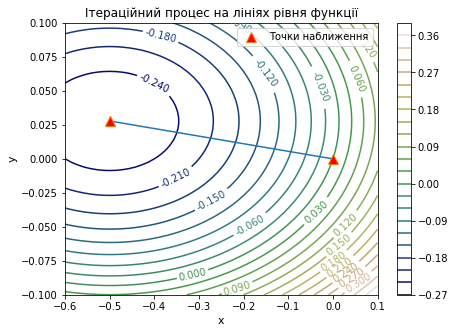

In [ ]:
[x, y], evolution = Newton_optimize([0, 0], max_iter = 50, function = function1, h_diff = 0.001)


plot2D(np.linspace(-0.6, 0.1), np.linspace(-0.1, 0.1), function1, evolution)

Ітерація 0, значення функції: 1901.00000 в точці [10, 10]
Ітерація 1, значення функції: -0.26403 в точці [-0.50013985  0.02791667]
Кількість ітерацій 1, точка мінімуму [-0.50013958  0.02791671]
Отриманий мінімум функції: -0.26403


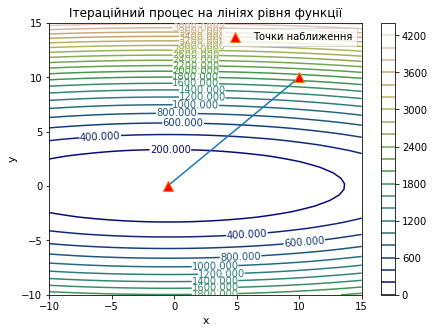

In [ ]:
[x, y], evolution = Newton_optimize([10, 10], max_iter = 50, function = function1, h_diff = 0.001)


plot2D(np.linspace(-10, 15), np.linspace(-10, 15), function1, evolution)

Ітерація 0, значення функції: 190100.00000 в точці [100, 100]
Ітерація 1, значення функції: -0.26403 в точці [-0.50061459  0.02788226]
Ітерація 2, значення функції: -0.26403 в точці [-0.50013958  0.02791671]
Кількість ітерацій 2, точка мінімуму [-0.50013958  0.02791671]
Отриманий мінімум функції: -0.26403


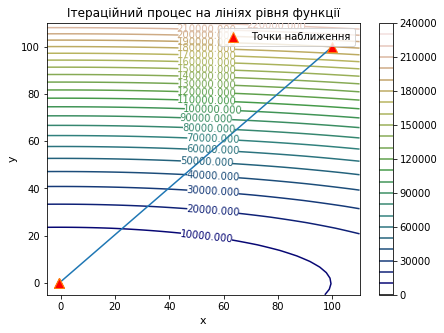

In [ ]:
[x, y], evolution = Newton_optimize([100, 100], max_iter = 50, function = function1, h_diff = 0.001)


plot2D(np.linspace(-5, 110), np.linspace(-5, 110), function1, evolution)

Ітерація 0, значення функції: 19010000.00000 в точці [1000, 1000]
Ітерація 1, значення функції: 0.89051 в точці [-1.53728582  0.09439941]
Ітерація 2, значення функції: -0.26403 в точці [-0.50013958  0.02791671]
Кількість ітерацій 2, точка мінімуму [-0.50013958  0.02791671]
Отриманий мінімум функції: -0.26403


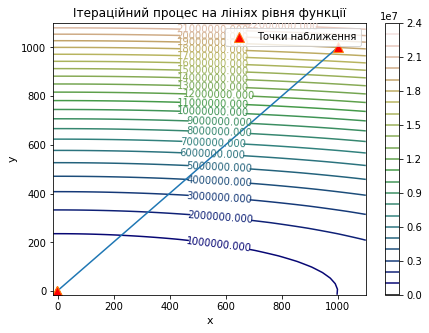

In [ ]:
[x, y], evolution = Newton_optimize([1000, 1000], max_iter = 50, function = function1, h_diff = 0.001)


plot2D(np.linspace(-15, 1100), np.linspace(-15, 1100), function1, evolution)

Ітерація 0, значення функції: 1901000000.00000 в точці [10000, 10000]
Ітерація 1, значення функції: 289793.39545 в точці [-538.713        -2.41507616]
Ітерація 2, значення функції: -0.26401 в точці [-0.50423456  0.02796531]
Ітерація 3, значення функції: -0.26403 в точці [-0.50013958  0.02791671]
Кількість ітерацій 3, точка мінімуму [-0.50013958  0.02791671]
Отриманий мінімум функції: -0.26403


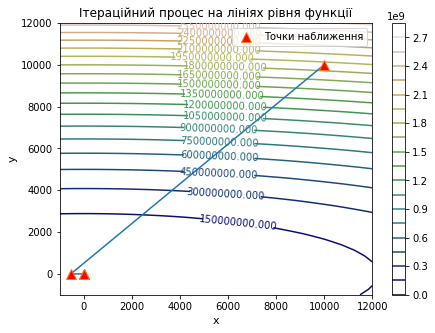

In [ ]:
[x, y], evolution = Newton_optimize([10000, 10000], max_iter = 50, function = function1, h_diff = 0.001)


plot2D(np.linspace(-1000, 12000), np.linspace(-1000, 12000), function1, evolution)

Для розглянутої функції застосування методу дроблення (крок дроблення l_drob = 0.5) навпаки збільшило кількість ітерацій. Тому можемо зробити висновок, що інколи ефективніше використовувати немодифікований метод Ньютона (сталий коефіціент а = 1), уникаючи зайвих обчислень.

Ітерація 0, значення функції: 1901000000.00000 в точці [10000, 10000]
Ітерація 5, значення функції: 1861120.62037 в точці [320.07591725 312.48682136]
Ітерація 10, значення функції: 1817.21373 в точці [9.51928694 9.79211017]
Ітерація 15, значення функції: 1.51085 в точці [-0.18703257  0.33304775]
Ітерація 20, значення функції: -0.26229 в точці [-0.49035499  0.03745205]
Ітерація 25, значення функції: -0.26403 в точці [-0.49983381  0.02821468]
Кількість ітерацій 27, точка мінімуму [-0.50010136  0.02795395]
Отриманий мінімум функції: -0.26403


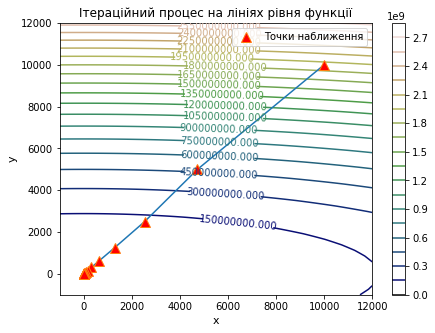

In [ ]:
[x, y], evolution = Newton_optimize([10000, 10000], max_iter = 50, function = function1,
                                    h_diff = 0.001, step_method = 'droblennya')


plot2D(np.linspace(-1000, 12000), np.linspace(-1000, 12000), function1, evolution)

Хоча ми не можемо стверджувати збіжність методу Ньютона для неопуклої функції Розенброка для довільео обраної початкової точки, для розглянутих нижче точок алгоритм знайшов точку мінімуму швидше, ніж градієнтний спуск, розглянутий у минулій роботі. При цьому якщо обрати більш віддалену точку, виникає проблема нульового детермінанту матриці других похідних, та алгоритм не дає результат.

In [ ]:
[x, y], evolution = Newton_optimize([10, 10], max_iter = 50, function = function2, h_diff = 0.001)

Ітерація 0, значення функції: 810081.00000 в точці [10, 10]
Ітерація 5, значення функції: 0.00000 в точці [0.99979938 0.99959881]
Кількість ітерацій 5, точка мінімуму [0.99980004 0.99960012]
Отриманий мінімум функції: 0.00000


In [ ]:
[x, y], evolution = Newton_optimize([100, 100], max_iter = 50, function = function2, h_diff = 0.001)

Ітерація 0, значення функції: 9801009801.00000 в точці [100, 100]
Ітерація 5, значення функції: 464.19879 в точці [ 22.54527285 508.28902011]
Ітерація 10, значення функції: 22.51293 в точці [1.02358388 0.57325186]
Кількість ітерацій 13, точка мінімуму [0.99980004 0.99960012]
Отриманий мінімум функції: 0.00000
